# Multiple Linear Regression 
###                         - with 3D visualization
    
## [where the length of a fish is predicted based on temperature of water and age of Fish.]


In [226]:
#reading data from Fish.csv
from numpy import *
data=genfromtxt("Fish.csv",delimiter=",")
#print(data)
data1=data

In [227]:
#deleating first row
data=delete(data,(0),axis=0)
print(data)

[[   14.    25.   620.]
 [   28.    25.  1315.]
 [   41.    25.  2120.]
 [   55.    25.  2600.]
 [   69.    25.  3110.]
 [   83.    25.  3535.]
 [   97.    25.  3935.]
 [  111.    25.  4465.]
 [  125.    25.  4530.]
 [  139.    25.  4570.]
 [  153.    25.  4600.]
 [   14.    27.   625.]
 [   28.    27.  1215.]
 [   41.    27.  2110.]
 [   55.    27.  2805.]
 [   69.    27.  3255.]
 [   83.    27.  4015.]
 [   97.    27.  4315.]
 [  111.    27.  4495.]
 [  125.    27.  4535.]
 [  139.    27.  4600.]
 [  153.    27.  4600.]
 [   14.    29.   590.]
 [   28.    29.  1305.]
 [   41.    29.  2140.]
 [   55.    29.  2890.]
 [   69.    29.  3920.]
 [   83.    29.  3920.]
 [   97.    29.  4515.]
 [  111.    29.  4520.]
 [  125.    29.  4525.]
 [  139.    29.  4565.]
 [  153.    29.  4566.]
 [   14.    31.   590.]
 [   28.    31.  1205.]
 [   41.    31.  1915.]
 [   55.    31.  2140.]
 [   69.    31.  2710.]
 [   83.    31.  3020.]
 [   97.    31.  3030.]
 [  111.    31.  3040.]
 [  125.    31. 

### Train Data

In [228]:
train=data[:int(len(data)*7/10)]
#print(train)

In [229]:
#storing y coordinates and x coordinates into another array list
y_mat=array(train[:,len(train[0])-1])
ex_mat2=array(train[:,len(train[0])-2])
ex_mat1=array(train[:,len(train[0])-3])
#print(y_mat)
#print(ex_mat1)
#print(ex_mat2)

In [230]:
#replacing all values of y with 1 in data and storing in a_mat.
a_mat=train
a_mat[:,len(a_mat[0])-1]=1
ex_mat1.resize(len(a_mat),1)
ex_mat2.resize(len(a_mat),1)
y_mat.resize(len(a_mat),1)

## caliculating intercepts at lowest error.

In [231]:
#caliculating unkown b0,b1,b2 by using lstsq
x_mat=matrix(linalg.lstsq(a_mat,y_mat)[0])
x_mat.resize(len(a_mat[0]),1)
y_pred=dot(a_mat,x_mat)
#print(x_mat)
#print(a_mat)
#print(y_pred)

In [232]:
#caliculating error
diff=(y_mat-y_pred)
error=sum(multiply(diff,diff))/len(a_mat)

In [233]:
#Error Function
def findError(a_mat,x_mat,y_act):
    y_pred=dot(a_mat,x_mat)
    y_act=y_act
    for i in range(len(y_act)):
        print("y_pred=",int(y_pred[i]),"y_act=",int(y_act[i]))
    diff=(y_act-y_pred)
    error=sum(multiply(diff,diff))/len(a_mat)
    print("Error:",error)
    return error

In [234]:
b0=float(x_mat[0])
b1=float(x_mat[1])
b2=float(x_mat[2])
print("b0=",b0)
print("b1=",b1)
print("b1=",b2)
print("Error=",error)

b0= 31.30397489413606
b1= 100.085352286093
b1= -1919.1425597189207
Error= 210303.853943


## Visualization of Train data

In [235]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
xx1, xx2 = np.meshgrid(np.linspace(min(ex_mat1),max(ex_mat1), 100), np.linspace(min(ex_mat2), max(ex_mat2), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = b0 * xx1 + b1 * xx2 + b2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

ax.set_xlabel('Age of Fish')
ax.set_ylabel('Temperature of Water')
ax.set_zlabel('Length of Fish')

# plot predicted plane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)
# plot actual data 
ax.scatter(ex_mat1, ex_mat2, y_mat,'*', color='red', alpha=1.0, facecolor='orange')

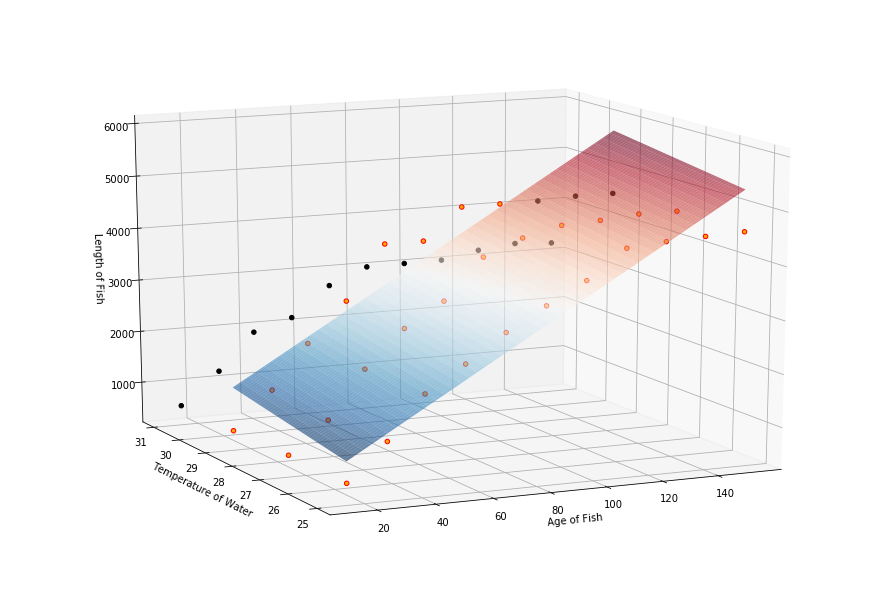

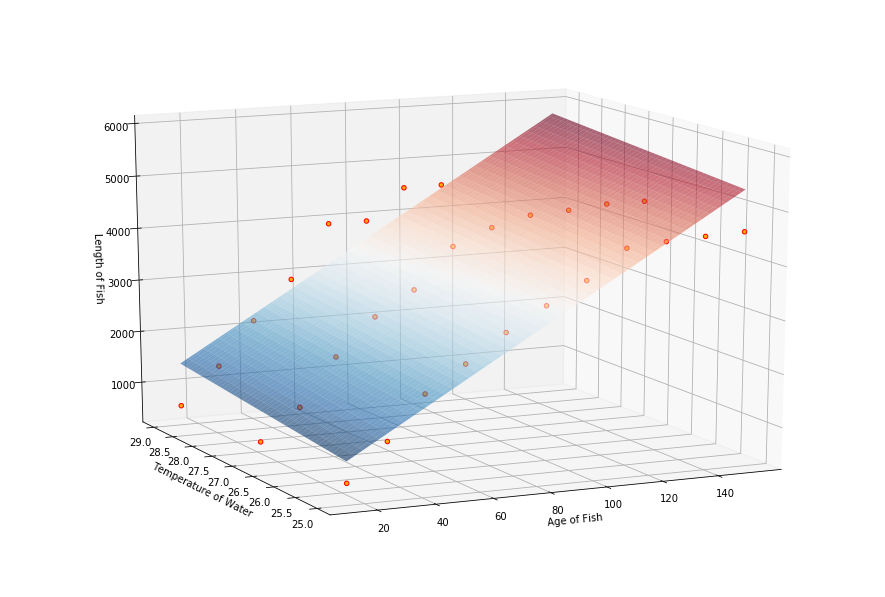

In [236]:
plt.show()

## testing

In [237]:
test=data[int(len(data)*7/10):]
print(test)

[[  125.    29.  4525.]
 [  139.    29.  4565.]
 [  153.    29.  4566.]
 [   14.    31.   590.]
 [   28.    31.  1205.]
 [   41.    31.  1915.]
 [   55.    31.  2140.]
 [   69.    31.  2710.]
 [   83.    31.  3020.]
 [   97.    31.  3030.]
 [  111.    31.  3040.]
 [  125.    31.  3180.]
 [  139.    31.  3257.]
 [  153.    31.  3214.]]


In [238]:
ty_mat=array(test[:,len(test[0])-1])
tex_mat2=array(test[:,len(test[0])-2])
tex_mat1=array(test[:,len(test[0])-3])
#print(ty_mat)
#print(tex_mat1)
#print(tex_mat2)

In [239]:
ta_mat=test
ta_mat[:,len(ta_mat[0])-1]=1
tex_mat1.resize(len(ta_mat),1)
tex_mat2.resize(len(ta_mat),1)
ty_mat.resize(len(ta_mat),1)

In [240]:
terror=findError(ta_mat,x_mat,ty_mat)

y_pred= 4896 y_act= 4525
y_pred= 5334 y_act= 4565
y_pred= 5772 y_act= 4566
y_pred= 1621 y_act= 590
y_pred= 2060 y_act= 1205
y_pred= 2466 y_act= 1915
y_pred= 2905 y_act= 2140
y_pred= 3343 y_act= 2710
y_pred= 3781 y_act= 3020
y_pred= 4219 y_act= 3030
y_pred= 4658 y_act= 3040
y_pred= 5096 y_act= 3180
y_pred= 5534 y_act= 3257
y_pred= 5973 y_act= 3214
Error: 1883002.14601


In [241]:
b0=float(x_mat[0])
b1=float(x_mat[1])
b2=float(x_mat[2])
print("b0=",b0)
print("b1=",b1)
print("b1=",b2)
print("Error=",terror)

b0= 31.30397489413606
b1= 100.085352286093
b1= -1919.1425597189207
Error= 1883002.14601


In [242]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
xx1, xx2 = np.meshgrid(np.linspace(min(tex_mat1),max(tex_mat1), 100), np.linspace(min(tex_mat2), max(tex_mat2), 100))
xx1, xx2 = np.meshgrid(np.linspace(min(ex_mat1),max(ex_mat1), 100), np.linspace(min(ex_mat2), max(ex_mat2), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = b0 * xx1 + b1 * xx2 + b2
#print(Z)

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

ax.set_xlabel('Age of Fish')
ax.set_ylabel('Temperature of Water')
ax.set_zlabel('Length of Fish')

# plot predicted plane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)
# plot actual data 
ax.scatter(ex_mat1, ex_mat2, y_mat,'*', color='red', alpha=1, facecolor='orange')
ax.scatter(tex_mat1, tex_mat2, ty_mat,'*', color='black', alpha=1.0, facecolor='black')

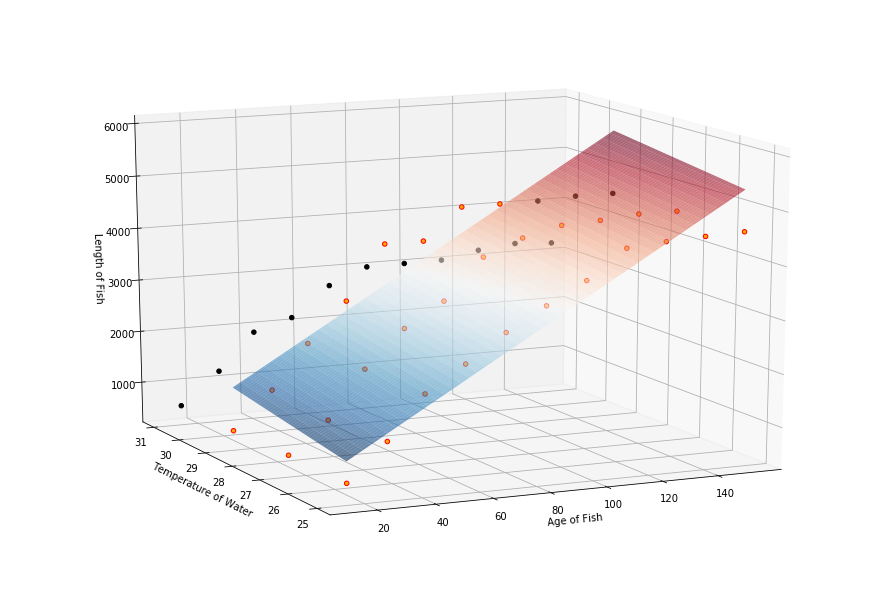

In [243]:
plt.show()